In [2]:
df=pd.read_csv(r"C:\Users\91987\Desktop\Data Train\Projects\Crime In India/10_Property_stolen_and_recovered.csv")

<IPython.core.display.Javascript object>

In [3]:
df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937


In [4]:
# We are dropping column Group_Name because it has same data as column Sub_Group_Name
df.drop("Group_Name",axis=1,inplace=True)

In [5]:
df.head()

,Area_Name,Year,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,3. Burglary,66,248,825115,4931904
3,Assam,2001,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,3. Burglary,367,3231,2327135,17023937


In [7]:
df.shape

(2449, 7)

In [8]:
# Checking null values
df.isnull().sum()

Area_Name                      0
Year                           0
Sub_Group_Name                 0
Cases_Property_Recovered       0
Cases_Property_Stolen          0
Value_of_Property_Recovered    0
Value_of_Property_Stolen       0
dtype: int64

<IPython.core.display.Javascript object>

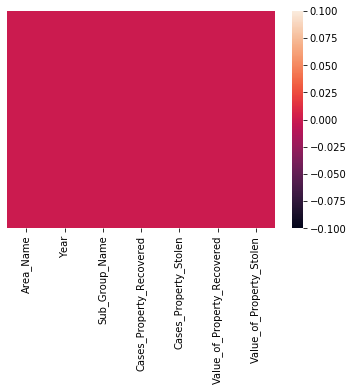

In [12]:
# Visualising null values

import warnings
warnings.simplefilter("ignore")
sns.heatmap(df.isnull(),yticklabels=False)

In [24]:
# Using the numbers in column "Sub_Group_Name" for respective crime. 
# for ex- using 3 for crime 3. Burglary
df['New_group'] = df['Sub_Group_Name'].str[:1]


In [25]:
df.head()

,Area_Name,Year,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen,New_group
0,Andaman & Nicobar Islands,2001,3. Burglary,27,64,755858,1321961,3
1,Andhra Pradesh,2001,3. Burglary,3321,7134,51483437,147019348,3
2,Arunachal Pradesh,2001,3. Burglary,66,248,825115,4931904,3
3,Assam,2001,3. Burglary,539,2423,3722850,21466955,3
4,Bihar,2001,3. Burglary,367,3231,2327135,17023937,3


In [26]:
# now we can drop column Sub_Group_Name
df.drop("Sub_Group_Name",axis=1,inplace=True)
df.head()

,Area_Name,Year,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen,New_group
0,Andaman & Nicobar Islands,2001,27,64,755858,1321961,3
1,Andhra Pradesh,2001,3321,7134,51483437,147019348,3
2,Arunachal Pradesh,2001,66,248,825115,4931904,3
3,Assam,2001,539,2423,3722850,21466955,3
4,Bihar,2001,367,3231,2327135,17023937,3


In [27]:
df.shape

(2449, 7)

In [32]:
# Handling Categorical Data column Area_Name using one hot Encoding
Area_Name_encoded=pd.get_dummies(df["Area_Name"],drop_first=True)

<IPython.core.display.Javascript object>

In [33]:
Area_Name_encoded

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra & Nagar Haveli,Daman & Diu,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Jharkhand,Karnataka,Kerala,Lakshadweep,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2445,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2447,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [38]:
# Concatinating encoded column and original dataset

df=pd.concat([df,Area_Name_encoded],axis=1)

<IPython.core.display.Javascript object>

In [39]:
# Dropping column Area_Name
df.drop("Area_Name",axis=1,inplace=True)

# Column was already drooped but cell was executed again by mistake so thats Y we are facing error.

KeyError: "['Area_Name'] not found in axis"

In [41]:
# final Data set we will be working on.
df.head()

,Year,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen,New_group,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra & Nagar Haveli,Daman & Diu,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Jharkhand,Karnataka,Kerala,Lakshadweep,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,2001,27,64,755858,1321961,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2001,3321,7134,51483437,147019348,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2001,66,248,825115,4931904,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2001,539,2423,3722850,21466955,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2001,367,3231,2327135,17023937,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
# Now we are considering Value_of_Property_Stolen as Target column.

x=df.drop("Value_of_Property_Stolen",axis=1)
x.head()

,Year,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,New_group,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra & Nagar Haveli,Daman & Diu,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Jharkhand,Karnataka,Kerala,Lakshadweep,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,2001,27,64,755858,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2001,3321,7134,51483437,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2001,66,248,825115,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2001,539,2423,3722850,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2001,367,3231,2327135,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
y=df["Value_of_Property_Stolen"]
y.head()

0      1321961
1    147019348
2      4931904
3     21466955
4     17023937
Name: Value_of_Property_Stolen, dtype: int64

__Splitting Data into Test Train__

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,test_size=0.25)

## Using Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:

lr.score(x_train,y_train)

0.605855002910821

In [56]:
from sklearn.linear_model import Lasso

In [57]:
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10], 'random_state':list(range(0,10))}
ls=Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [60]:
ls= Lasso(alpha=10, random_state=0)
ls.fit(x_train,y_train)
ls.score(x_test,y_test)

0.5796987882070329

In [61]:
pred_ls=ls.predict(x_test)

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [62]:
r2_score(y_test,pred_ls)

0.5796987882070329

## Using Decission Tree

In [63]:
from sklearn.tree import DecisionTreeRegressor

parameters= {'criterion':['mse','friedman_mse','mae'],'splitter':['best','random']}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'splitter': 'random'}


In [64]:
dt = DecisionTreeRegressor(criterion='mae', splitter='random')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decission = dt.predict(x_test)


In [66]:
dts= r2_score(y_test,pred_decission)
print(dts)

0.5823812087833726


## Using Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['friedman_mse','mae'],'n_estimators':[100,200,300]}
rf=RandomForestRegressor()
clf= GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'n_estimators': 200}


In [68]:
rf = RandomForestRegressor(criterion='mae', n_estimators=200)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_random = rf.predict(x_test)

rfs= r2_score(y_test,pred_random)
print("r2 Score :", rfs*100)

r2 Score : 72.11625473123414


### Best Model upto now is Random Forest so we will be using it for prediction

#### Model Saving

In [69]:
import pickle
filename='Crime_India'
pickle.dump(rf,open(filename,'wb'))